#Assignment 8 
  #1. Mount the drive
  #2. Append the drive path to system path
  #3. Import files/modules and execute modules
  #Using Resnet18
  

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/My\ Drive/eva-04/S8/*.py 

'/content/gdrive/My Drive/eva-04/S8/CIFARModel10.py'
'/content/gdrive/My Drive/eva-04/S8/collect_env.py'
'/content/gdrive/My Drive/eva-04/S8/global_fun.py'
'/content/gdrive/My Drive/eva-04/S8/__init__.py'
'/content/gdrive/My Drive/eva-04/S8/Model.py'


In [0]:
!cat '/content/gdrive/My Drive/eva-04/S8/Model.py'

In [0]:
!cat '/content/gdrive/My Drive/eva-04/S8/global_fun.py'

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S8/')

Now we can import the library and use the function.

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def miscImages(model, device, test_loader):
    model.eval()
    test_loss = 0
    incorrect = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            for i in range(len(target)):
              if pred[i].item() != target[i]:
                incorrect += 1
                print('\n\n{} [ Predicted Value: {}, Actual Value: {} ]'.format(
                incorrect, pred[i].item(), target[i], ))
                plt.imshow(data[i].cpu().numpy().squeeze(), cmap='gray_r')
                plt.show()


In [0]:

import matplotlib.pyplot as plt
def draw_accuracy_loss_change_graps(model_0,model_l1,model_l2,model_l1_l2):
    fig, axs = plt.subplots(2,2,figsize=(30,20))
    #print('train_losses=',len(train_losses))
    #print('test_losses=',len(test_losses))

    axs[0,0].plot(model_0.m_test_losses,color='black',label='No Regularization')
    axs[0,0].plot(model_l1.m_test_losses,color='red',label='L1 Regularization')
    axs[0,0].plot(model_l2.m_test_losses,color='blue',label='L2 Regularization')
    axs[0,0].plot(model_l1_l2.m_test_losses,color='green',label='Both L1 and L2 Regularization')
    axs[0,0].set_title("Validation Loss Change")
    axs[0,0].legend(loc="center")

    axs[0,1].plot(model_0.m_test_acc,color='black',label='No Regularization')
    axs[0,1].plot(model_l1.m_test_acc,color='red',label='L1 Regularization')
    axs[0,1].plot(model_l2.m_test_acc,color='blue',label='L2 Regularization')
    axs[0,1].plot(model_l1_l2.m_test_acc,color='green',label='Both L1 and L2 Regularization')
    axs[0,1].set_title("Validation Accuracy Change")
    axs[0,1].legend(loc="center")

    axs[1,0].plot(model_0.m_train_losses,color='black',label='No Regularization')
    axs[1,0].plot(model_l1.m_train_losses,color='red',label='L1 Regularization')
    axs[1,0].plot(model_l2.m_train_losses,color='blue',label='L2 Regularization')
    axs[1,0].plot(model_l1_l2.m_train_losses,color='green',label='Both L1 and L2 Regularization')
    axs[1,0].set_title("Training Loss Change")
    axs[1,0].legend(loc="center")

    axs[1,1].plot(model_0.m_train_acc,color='black',label='No Regularization')
    axs[1,1].plot(model_l1.m_train_acc,color='red',label='L1 Regularization')
    axs[1,1].plot(model_l2.m_train_acc,color='blue',label='L2 Regularization')
    axs[1,1].plot(model_l1_l2.m_train_acc,color='green',label='Both L1 and L2 Regularization')
    axs[1,1].set_title("Training Accuracy Change")
    axs[1,1].legend(loc="center")

In [10]:
import Model as m
import CIFARModel10 as cifar

import importlib
importlib.reload(m)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = m.ResNet18().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)

cifar_model = cifar.CIFARModel10(model)

from global_fun import test_model
from global_fun import train_model
from global_fun import show_summary, run_model 


Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


SHOW PARAMETERS

In [11]:
show_summary(cifar_model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

RUNNING WITH REGULARIZATION

In [12]:
run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.00001, EPOCHS=40)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 0


Loss=2.582077980041504 Batch_id=195 Accuracy=33.51: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 4452/10000 (44.52%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 1


Loss=2.4000906944274902 Batch_id=195 Accuracy=49.13: 100%|██████████| 196/196 [00:27<00:00,  7.06it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 5208/10000 (52.08%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 2


Loss=2.23280668258667 Batch_id=195 Accuracy=56.85: 100%|██████████| 196/196 [00:27<00:00,  7.03it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 5988/10000 (59.88%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 3


Loss=2.1828274726867676 Batch_id=195 Accuracy=62.90: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6188/10000 (61.88%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 4


Loss=2.0051746368408203 Batch_id=195 Accuracy=66.84: 100%|██████████| 196/196 [00:27<00:00,  7.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6817/10000 (68.17%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 5


Loss=1.9118990898132324 Batch_id=195 Accuracy=70.23: 100%|██████████| 196/196 [00:28<00:00,  6.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6917/10000 (69.17%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 6


Loss=2.1903138160705566 Batch_id=195 Accuracy=72.92: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7125/10000 (71.25%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 7


Loss=1.8169516324996948 Batch_id=195 Accuracy=74.96: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7343/10000 (73.43%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 8


Loss=1.8295714855194092 Batch_id=195 Accuracy=76.79: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7333/10000 (73.33%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 9


Loss=1.7249517440795898 Batch_id=195 Accuracy=78.27: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7747/10000 (77.47%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 10


Loss=1.6085751056671143 Batch_id=195 Accuracy=79.91: 100%|██████████| 196/196 [00:28<00:00,  6.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7557/10000 (75.57%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 11


Loss=1.6881858110427856 Batch_id=195 Accuracy=80.91: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7731/10000 (77.31%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 12


Loss=1.7062757015228271 Batch_id=195 Accuracy=82.01: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8003/10000 (80.03%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 13


Loss=1.6774433851242065 Batch_id=195 Accuracy=82.87: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7937/10000 (79.37%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 14


Loss=1.8837974071502686 Batch_id=195 Accuracy=83.84: 100%|██████████| 196/196 [00:28<00:00,  6.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7983/10000 (79.83%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 15


Loss=1.7490853071212769 Batch_id=195 Accuracy=84.63: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8036/10000 (80.36%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 16


Loss=1.6363017559051514 Batch_id=195 Accuracy=85.21: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8260/10000 (82.60%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 17


Loss=1.5015439987182617 Batch_id=195 Accuracy=85.80: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8254/10000 (82.54%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 18


Loss=1.4963165521621704 Batch_id=195 Accuracy=86.56: 100%|██████████| 196/196 [00:27<00:00,  7.00it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8118/10000 (81.18%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 19


Loss=1.4809980392456055 Batch_id=195 Accuracy=86.84: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8142/10000 (81.42%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 20


Loss=1.4126307964324951 Batch_id=195 Accuracy=87.40: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8385/10000 (83.85%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 21


Loss=1.4056658744812012 Batch_id=195 Accuracy=87.85: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8344/10000 (83.44%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 22


Loss=1.4245319366455078 Batch_id=195 Accuracy=88.58: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8450/10000 (84.50%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 23


Loss=1.4067023992538452 Batch_id=195 Accuracy=88.94: 100%|██████████| 196/196 [00:27<00:00,  7.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8419/10000 (84.19%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 24


Loss=1.4217957258224487 Batch_id=195 Accuracy=89.32: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8423/10000 (84.23%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 25


Loss=1.4545726776123047 Batch_id=195 Accuracy=89.89: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8431/10000 (84.31%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 26


Loss=1.4136711359024048 Batch_id=195 Accuracy=90.22: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8452/10000 (84.52%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 27


Loss=1.4237580299377441 Batch_id=195 Accuracy=90.67: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8441/10000 (84.41%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 28


Loss=1.4408036470413208 Batch_id=195 Accuracy=90.78: 100%|██████████| 196/196 [00:28<00:00,  6.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8532/10000 (85.32%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 29


Loss=1.374611735343933 Batch_id=195 Accuracy=91.31: 100%|██████████| 196/196 [00:28<00:00,  6.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8217/10000 (82.17%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 30


Loss=1.4408155679702759 Batch_id=195 Accuracy=91.52: 100%|██████████| 196/196 [00:28<00:00,  6.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8468/10000 (84.68%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 31


Loss=1.345930576324463 Batch_id=195 Accuracy=91.81: 100%|██████████| 196/196 [00:28<00:00,  6.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8370/10000 (83.70%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 32


Loss=1.3619356155395508 Batch_id=195 Accuracy=92.19: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8419/10000 (84.19%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 33


Loss=1.3254563808441162 Batch_id=195 Accuracy=92.47: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8488/10000 (84.88%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 34


Loss=1.4884114265441895 Batch_id=195 Accuracy=92.53: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8620/10000 (86.20%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 35


Loss=1.406037449836731 Batch_id=195 Accuracy=92.92: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8602/10000 (86.02%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 36


Loss=1.2766598463058472 Batch_id=195 Accuracy=93.28: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8561/10000 (85.61%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 37


Loss=1.1845755577087402 Batch_id=195 Accuracy=93.43: 100%|██████████| 196/196 [00:28<00:00,  6.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8401/10000 (84.01%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 38


Loss=1.243421196937561 Batch_id=195 Accuracy=93.51: 100%|██████████| 196/196 [00:28<00:00,  7.00it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8617/10000 (86.17%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 39


Loss=1.3275253772735596 Batch_id=195 Accuracy=93.66: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]



Test set: Average loss: 0.0021, Accuracy: 8529/10000 (85.29%)



ACCURACY , LOSS CHANGE GRAPHS


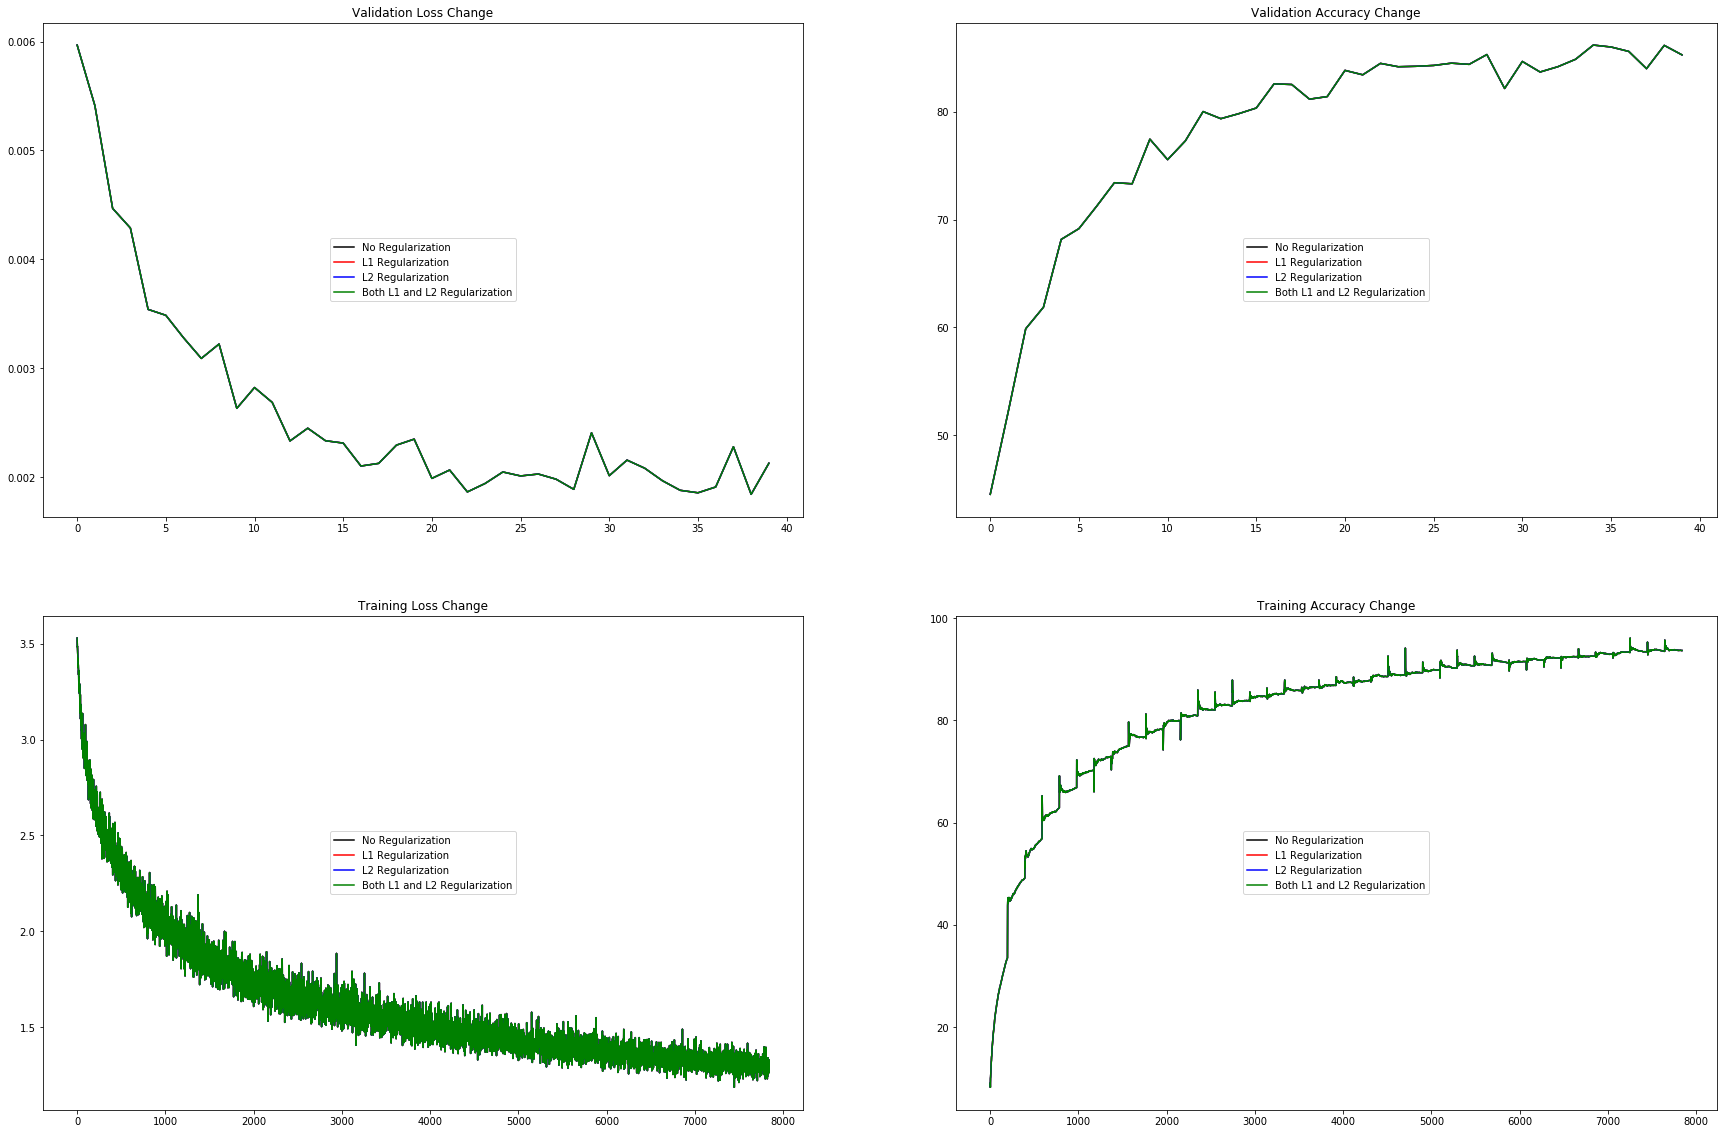

In [13]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)

DISPLAY MISCLASSIFICATION IMAGES

In [19]:
miscImages(cifar_model.m_model,device,cifar_model.m_test_loader)

IndexError: ignored